## Latar Belakang

Kinerja operasional armada taksi sangat bergantung pada bagaimana rute dijalankan, struktur tarif, serta kondisi lalu lintas. Dengan memahami hubungan antara jarak, durasi, biaya, dan lokasi (pickup/dropoff), operator dapat mengidentifikasi rute yang tidak efisien, meninjau struktur tarif di zona tertentu, serta menerapkan kebijakan penempatan armada dan dynamic pricing.

## Pernyataan Masalah

Mengoptimalkan tarif, rute, dan penempatan armada untuk meningkatkan efisiensi operasional dan profitabilitas taksi.

**Tujuan analisis:**

- Menghitung metrik efisiensi per perjalanan (speed, cost_per_mile, cost_per_min, efficiency_index).
- Mengidentifikasi rute dan zona yang tidak efisien.
- Menemukan jam-jam dengan efisiensi rendah.
- Memberikan rekomendasi operasional dan tarif berdasarkan temuan.

## Data

File CSV yang digunakan: `NYC TLC Trip Record.csv`. 
Dataset NYC TLC Trip Record dapat diakses [di sini](https://drive.google.com/drive/folders/1NYHIL-RgVPW-HONz4pdzlcbIChF-c37N)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import shapiro
import warnings
warnings.filterwarnings("ignore")


Dataset ini berisi informasi terkait detail perjalanan taksi di New York City. Setiap baris mencatat satu perjalanan taksi lengkap dengan waktu, jarak, lokasi, tarif, dan jenis pembayaran.
Berikut penjelasan kolom-kolom di dalam dataset:

* VendorID : Kode unik penyedia layanan taksi (vendor) yang mencatat perjalanan.

* lpep_pickup_datetime : Tanggal & waktu ketika perjalanan mulai (penumpang naik dan argo aktif).

* lpep_dropoff_datetime : Tanggal & waktu ketika perjalanan selesai (argo berhenti).

* store_and_fwd_flag : Menandakan apakah data perjalanan disimpan sementara di memori kendaraan sebelum dikirim ke server.

* RatecodeID : Kode jenis tarif yang digunakan pada akhir perjalanan

* PULocationID : Kode zona lokasi penjemputan berdasarkan NYC Taxi Zone.

* DOLocationID : Kode zona lokasi penurunan penumpang berdasarkan NYC Taxi Zone.

* passenger_count : Jumlah penumpang dalam perjalanan (diinput oleh pengemudi).

* trip_distance : Jarak perjalanan dalam mil (diukur oleh taksimeter).

* fare_amount : Biaya perjalanan berdasarkan waktu dan jarak, sesuai tarif dasar.

* extra : Biaya tambahan (misal overnight fee atau rush hour fee).

* mta_tax : Pajak MTA sebesar $0.50 yang dikenakan otomatis.

* tip_amount : Jumlah tip yang diberikan penumpang.
Dicatat otomatis untuk pembayaran kartu kredit.

* tolls_amount : Total biaya tol (jika perjalanan melewati jalan tol berbayar).

* ehail_fee : Biaya tambahan untuk layanan e-hail (sering kosong/NaN pada dataset tertentu).

* improvement_surcharge : Biaya tambahan $0.30 yang diberlakukan pada setiap perjalanan taksi.

* total_amount : Jumlah pembayaran total oleh penumpang (belum termasuk tip tunai).

* payment_type : Jenis pembayaran yang digunakan

* trip_type : Jenis perjalanan

* congestion_surcharge : Biaya tambahan yang dikenakan untuk kemacetan

Berikut 2 baris teratas dan terbawah dari dataset NYC TLC Trip Record (dataset dapat diakses [di sini](https://drive.google.com/drive/folders/1NYHIL-RgVPW-HONz4pdzlcbIChF-c37N))

In [2]:

df = pd.read_csv('NYC TLC Trip Record.csv')
display(df.head(),df.tail())

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,1.0,0.5,4.03,0.0,NaN,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,1.0,0.5,2.64,0.0,NaN,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,1.0,0.5,1.94,0.0,NaN,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,0.5,1.5,1.70,0.0,NaN,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,0.5,1.5,0.00,0.0,NaN,1.0,8.00,1.0,1.0,0.00


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
68206,2,2023-01-31 22:29:00,2023-01-31 22:42:00,NaN,NaN,49,62,NaN,4070.82,15.70,0.0,0.0,0.00,0.0,NaN,1.0,16.70,NaN,NaN,NaN
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,NaN,NaN,10,205,NaN,2.14,4.41,0.0,0.0,0.00,0.0,NaN,1.0,5.41,NaN,NaN,NaN
68208,2,2023-01-31 23:46:00,2023-02-01 00:02:00,NaN,NaN,66,37,NaN,3.44,16.53,0.0,0.0,3.51,0.0,NaN,1.0,21.04,NaN,NaN,NaN
68209,2,2023-01-31 23:01:00,2023-01-31 23:19:00,NaN,NaN,225,189,NaN,3.03,14.98,0.0,0.0,3.20,0.0,NaN,1.0,19.18,NaN,NaN,NaN
68210,2,2023-01-31 23:51:00,2023-02-01 00:07:00,NaN,NaN,256,140,NaN,5.82,23.65,0.0,0.0,2.00,0.0,NaN,1.0,29.40,NaN,NaN,NaN


Sebelum melakukan analisis lebih jauh, kita perlu memastikan bahwa data perjalanan sudah dalam format yang benar dan telah dilengkapi dengan fitur-fitur tambahan yang relevan untuk mengukur efisiensi operasional. Bagian ini menjelaskan proses pembersihan data (data cleaning) dan pembuatan fitur baru (feature engineering) yang akan digunakan dalam analisis.

In [18]:
# konversi kolom tanggal dan waktu
for col in ['lpep_pickup_datetime','lpep_dropoff_datetime']:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col], errors='coerce')

# konversi kolom numerik
num_cols = ['trip_distance','fare_amount','extra','mta_tax','tip_amount','tolls_amount',
            'improvement_surcharge','total_amount','congestion_surcharge','passenger_count',
            'RatecodeID','payment_type','trip_type']
for c in num_cols:
    if c in df.columns:
        df[c] = pd.to_numeric(df[c], errors='coerce')

# menghhitung durasi perjalanan
if 'lpep_pickup_datetime' in df.columns and 'lpep_dropoff_datetime' in df.columns:
    df['duration_min'] = (df['lpep_dropoff_datetime'] - df['lpep_pickup_datetime']).dt.total_seconds() / 60
else:
    df['duration_min'] = np.nan

# menghitung kecepatan rata-rata
df['duration_hr'] = df['duration_min'] / 60
df['speed_mph'] = df['trip_distance'] / df['duration_hr']
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# menentukan variabel cost_used
df['cost_used'] = df['total_amount'] if 'total_amount' in df.columns else df.get('fare_amount')
# meenghitung cost-per-mile dan cost-per-minute
df['cost_per_mile'] = df['cost_used'] / df['trip_distance']
df['cost_per_min'] = df['cost_used'] / df['duration_min']

# mengukur efisiensi pendapatan per unit waktu dan jarak.
df['efficiency_index'] = df['cost_used'] / ((df['duration_min'].fillna(0)+1) * (df['trip_distance'].fillna(0)+1)**0.5)

# Menyaring erjalanan alid
df_valid = df[(df['duration_min']>0) & (df['trip_distance']>0)].copy()

print('Original rows:', df.shape[0], 'Valid rows for analysis:', df_valid.shape[0])

Original rows: 68211 Valid rows for analysis: 64857


## Data Understanding and Cleaning

Sebelum masuk ke dalam analisis, kita perlu mengenal dataset kita lebih jauh dalam tahapan *data understanding*. Dari proses ini, kita akan tahu anomali-anomali apa saja yang terdapat di dalam dataset kita dan perlu ditangani dalam tahapan *data cleaning*. Setiap penanganan anomali yang dilakukan, akan disertai dengan justifikasi langkah yang diambil, baik secara *domain knowledge* maupun secara statistik.

In [3]:
print(f'Jumlah baris dan kolom di dataset df adalah {df.shape}')
df.info()

Jumlah baris dan kolom di dataset df adalah (68211, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68211 entries, 0 to 68210
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               68211 non-null  int64  
 1   lpep_pickup_datetime   68211 non-null  object 
 2   lpep_dropoff_datetime  68211 non-null  object 
 3   store_and_fwd_flag     63887 non-null  object 
 4   RatecodeID             63887 non-null  float64
 5   PULocationID           68211 non-null  int64  
 6   DOLocationID           68211 non-null  int64  
 7   passenger_count        63887 non-null  float64
 8   trip_distance          68211 non-null  float64
 9   fare_amount            68211 non-null  float64
 10  extra                  68211 non-null  float64
 11  mta_tax                68211 non-null  float64
 12  tip_amount             68211 non-null  float64
 13  tolls_amount           68211 non-null  float64
 14

In [4]:
display(df.describe(), df.describe(include='object'))

,VendorID,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
count,68211.000000,63887.000000,68211.000000,68211.000000,63887.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,0.0,68211.000000,68211.000000,63887.000000,63877.000000,63887.000000
mean,1.863028,1.117160,98.549735,138.429901,1.315870,8.114852,16.603545,0.825431,0.588340,2.139012,0.169627,NaN,0.951625,21.789377,1.373613,1.021933,0.726748
std,0.343820,1.372913,61.244314,76.761311,0.979054,585.105955,13.470121,1.269904,0.385819,3.052710,1.099789,NaN,0.196875,15.457115,0.508039,0.146465,1.212836
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-70.000000,-2.500000,-0.500000,-10.500000,0.000000,NaN,-1.000000,-71.500000,1.000000,1.000000,-2.750000
25%,2.000000,1.000000,74.000000,74.000000,1.000000,1.110000,9.300000,0.000000,0.500000,0.000000,0.000000,NaN,1.000000,12.900000,1.000000,1.000000,0.000000
50%,2.000000,1.000000,75.000000,138.000000,1.000000,1.850000,13.500000,0.000000,0.500000,1.600000,0.000000,NaN,1.000000,17.900000,1.000000,1.000000,0.000000
75%,2.000000,1.000000,129.000000,219.000000,1.000000,3.210000,19.800000,1.000000,0.500000,3.330000,0.000000,NaN,1.000000,26.150000,2.000000,1.000000,2.750000
max,2.000000,99.000000,265.000000,265.000000,9.000000,120098.840000,490.000000,12.500000,2.750000,222.220000,36.050000,NaN,1.000000,491.000000,5.000000,2.000000,2.750000


,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag
count,68211,68211,63887
unique,66575,66519,2
top,2023-01-09 09:08:00,2023-01-09 00:00:00,N
freq,4,6,63579


In [5]:
pd.set_option('display.max_colwidth', None)
listItem = []
for col in df.columns:
    uniq = df[col].unique()
    listItem.append([
        col,
        df[col].nunique(),
        uniq 
    ])

tabel1Desc = pd.DataFrame(
    columns=['Column Name', 'Number of Unique', 'Unique Sample'],
    data=listItem
)

tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,VendorID,2,"[2, 1]"
1,lpep_pickup_datetime,66575,"[2023-01-01 00:26:10, 2023-01-01 00:51:03, 2023-01-01 00:35:12, 2023-01-01 00:13:14, 2023-01-01 00:33:04, 2023-01-01 00:53:31, 2023-01-01 00:09:14, 2023-01-01 00:11:58, 2023-01-01 00:41:29, 2023-01-01 00:50:32, 2023-01-01 00:16:12, 2023-01-01 00:08:43, 2023-01-01 00:26:32, 2023-01-01 00:18:35, 2023-01-01 00:39:32, 2023-01-01 00:49:34, 2023-01-01 00:10:45, 2023-01-01 00:35:11, 2023-01-01 00:31:06, 2023-01-01 00:14:37, 2023-01-01 00:26:21, 2023-01-01 00:41:56, 2023-01-01 00:32:02, 2023-01-01 00:55:13, 2023-01-01 00:01:31, 2023-01-01 00:22:31, 2023-01-01 00:57:28, 2023-01-01 00:35:21, 2023-01-01 00:52:52, 2023-01-01 00:32:56, 2023-01-01 00:24:01, 2023-01-01 00:46:48, 2023-01-01 00:40:58, 2023-01-01 00:20:23, 2023-01-01 01:49:24, 2023-01-01 00:41:53, 2023-01-01 00:56:26, 2023-01-01 00:33:10, 2023-01-01 00:58:28, 2023-01-01 00:42:49, 2023-01-01 00:48:21, 2023-01-01 00:08:05, 2023-01-01 00:13:47, 2023-01-01 00:16:10, 2023-01-01 00:04:25, 2023-01-01 00:33:38, 2023-01-01 00:46:08, 2023-01-01 01:00:08, 2023-01-01 00:28:04, 2023-01-01 00:23:04, 2023-01-01 00:34:07, 2023-01-01 00:52:03, 2023-01-01 00:25:31, 2023-01-01 00:53:09, 2023-01-01 00:42:37, 2023-01-01 00:39:52, 2023-01-01 00:15:32, 2023-01-01 00:06:48, 2023-01-01 00:57:15, 2023-01-01 00:14:13, 2023-01-01 00:52:48, 2023-01-01 00:34:13, 2023-01-01 00:44:41, 2023-01-01 00:11:12, 2023-01-01 01:44:43, 2023-01-01 01:04:44, 2023-01-01 01:48:11, 2023-01-01 01:11:39, 2023-01-01 01:54:25, 2023-01-01 01:59:10, 2023-01-01 01:22:35, 2023-01-01 01:37:10, 2023-01-01 01:46:22, 2023-01-01 01:59:48, 2023-01-01 01:09:49, 2023-01-01 01:23:35, 2023-01-01 01:53:20, 2023-01-01 01:32:14, 2023-01-01 01:01:05, 2023-01-01 01:34:41, 2023-01-01 01:52:08, 2023-01-01 01:49:28, 2023-01-01 01:03:59, 2023-01-01 01:13:11, 2023-01-01 01:40:06, 2023-01-01 01:33:50, 2023-01-01 01:45:19, 2023-01-01 01:51:29, 2023-01-01 01:34:07, 2023-01-01 01:10:08, 2023-01-01 01:32:17, 2023-01-01 01:48:28, 2023-01-01 01:30:43, 2023-01-01 01:51:10, 2023-01-01 01:09:36, 2023-01-01 01:19:54, 2023-01-01 01:31:10, 2023-01-01 01:42:30, 2023-01-01 00:57:51, 2023-01-01 01:27:36, ...]"
2,lpep_dropoff_datetime,66519,"[2023-01-01 00:37:11, 2023-01-01 00:57:49, 2023-01-01 00:41:32, 2023-01-01 00:19:03, 2023-01-01 00:39:02, 2023-01-01 01:11:04, 2023-01-01 00:26:39, 2023-01-01 00:24:55, 2023-01-01 00:46:26, 2023-01-01 01:13:42, 2023-01-01 00:41:43, 2023-01-01 00:17:08, 2023-01-01 00:45:31, 2023-01-01 00:30:09, 2023-01-01 01:18:06, 2023-01-01 01:08:23, 2023-01-01 00:19:37, 2023-01-01 01:17:35, 2023-01-01 00:42:23, 2023-01-01 00:21:50, 2023-01-01 00:30:26, 2023-01-01 00:46:06, 2023-01-01 00:41:25, 2023-01-01 00:59:47, 2023-01-01 00:16:02, 2023-01-01 00:39:24, 2023-01-01 01:09:31, 2023-01-01 00:53:49, 2023-01-01 01:00:53, 2023-01-01 00:42:53, 2023-01-01 00:32:05, 2023-01-01 01:08:17, 2023-01-01 01:04:32, 2023-01-01 00:24:32, 2023-01-01 01:57:51, 2023-01-01 00:41:58, 2023-01-01 01:14:41, 2023-01-01 00:43:08, 2023-01-01 01:14:46, 2023-01-01 00:51:53, 2023-01-01 01:23:50, 2023-01-01 00:13:26, 2023-01-01 00:25:57, 2023-01-01 00:54:55, 2023-01-01 00:17:50, 2023-01-01 00:38:51, 2023-01-01 00:59:10, 2023-01-01 01:05:46, 2023-01-01 00:43:45, 2023-01-01 23:18:32, 2023-01-01 00:50:01, 2023-01-01 00:57:56, 2023-01-01 00:38:40, 2023-01-01 01:13:35, 2023-01-01 00:47:15, 2023-01-01 00:48:54, 2023-01-01 00:23:03, 2023-01-01 01:08:47, 2023-01-01 01:00:15, 2023-01-01 00:25:43, 2023-01-01 01:21:19, 2023-01-01 00:43:57, 2023-01-01 00:48:26, 2023-01-01 00:38:12, 2023-01-01 01:57:31, 2023-01-01 01:11:23, 2023-01-01 02:05:51, 2023-01-01 01:41:21, 2023-01-01 02:05:19, 2023-01-01 02:11:36, 2023-01-01 01:25:11, 2023-01-01 01:41:30, 2023-01-01 02:04:14, 2023-01-01 02:05:29, 2023-01-01 01:17:55, 2023-01-01 01:53:43, 2023-01-01 02:27:01, 2023-01-01 01:43:55, 2023-01-01 01:13:02, 2023-01-01 02:00:06, 2023-01-01 02:00:57, 2023-01-01 02:13:18, 2023-01-01 01:07:17, 2023-01-01 01:26:01, 2

## Missing Value 

Analisis missing value untuk mengetahui kolom yang perlu penanganan.

In [6]:
# persentase keseluruhan missing value di tiap kolom
df.isna().sum()/df.shape[0]*100

VendorID                   0.000000
lpep_pickup_datetime       0.000000
lpep_dropoff_datetime      0.000000
store_and_fwd_flag         6.339154
RatecodeID                 6.339154
PULocationID               0.000000
DOLocationID               0.000000
passenger_count            6.339154
trip_distance              0.000000
fare_amount                0.000000
extra                      0.000000
mta_tax                    0.000000
tip_amount                 0.000000
tolls_amount               0.000000
ehail_fee                100.000000
improvement_surcharge      0.000000
total_amount               0.000000
payment_type               6.339154
trip_type                  6.353814
congestion_surcharge       6.339154
dtype: float64

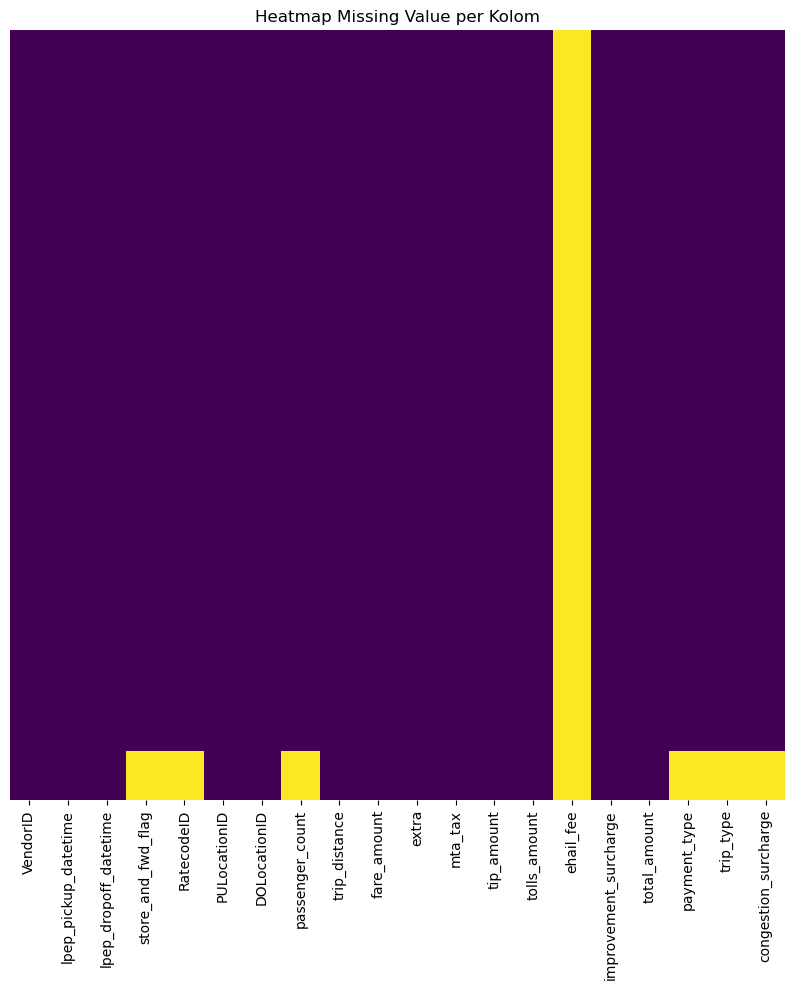

In [7]:
# sebaran missing value di dalam data
plt.figure(figsize=(10,10))
sns.heatmap(df.isna(), cbar=False, yticklabels=False, cmap='viridis')
plt.title('Heatmap Missing Value per Kolom')
plt.show()

Secara garis besar, missing value pada kolom ehail_fee memiliki proporsi yang sangat besar, yaitu mencapai 100%. Hal ini berarti seluruh data pada kolom tersebut kosong dan tidak memiliki nilai sama sekali.

Kolom store_and_fwd_flag memiliki missing value sekitar 6.33%.
Kolom ini berfungsi untuk menunjukkan apakah data perjalanan disimpan sementara di memori kendaraan (store-and-forward) sebelum dikirim ke server.

Kolom RatecodeID juga memiliki missing value sekitar 6.33%.
Kolom ini mencatat jenis tarif yang diterapkan pada perjalanan, misalnya tarif standar, JFK, Newark, atau negosiasi.

Kolom passenger_count memiliki missing value sebesar 6.33%.
Kolom ini berisi informasi jumlah penumpang dan biasanya diinput secara manual oleh pengemudi taksi.

Kolom payment_type juga memiliki proporsi missing value sebesar 6.33%.
Kolom ini menunjukkan metode pembayaran seperti kartu kredit, tunai, no charge, dispute, dan sebagainya.

Kolom congestion_surcharge memiliki missing value sekitar 6.33%.
Kolom ini berisi biaya tambahan yang dikenakan pada wilayah dengan tingkat kemacetan tertentu.

Kolom trip_type memiliki missing value sekitar 6.35%, sedikit lebih tinggi dibanding kolom lain yang missing-nya serupa.

berikut untuk menangani missing value:

* Kolom dengan missing value besar seperti ehail_fee → diisi 0, karena memang tidak ada biaya.
* Kolom kategorikal dengan missing 6% seperti
store_and_fwd_flag, RatecodeID, payment_type, trip_type
dapat diisi modus.
* Kolom numerik seperti passenger_count dapat diisi median.
* Kolom surcharge seperti congestion_surcharge → diisi 0 karena absence means no surcharge.

In [8]:
# Mengisi missing value pada kolom ehail_fee dengan 0
df['ehail_fee'] = df['ehail_fee'].fillna(0)

# Mengisi missing value pada kolom store_and_fwd_flag dengan modus
df['store_and_fwd_flag'] = df['store_and_fwd_flag'].fillna(df['store_and_fwd_flag'].mode()[0])

# Mengisi missing value pada kolom RatecodeID dengan modus
df['RatecodeID'] = df['RatecodeID'].fillna(df['RatecodeID'].mode()[0])

# Mengisi missing value pada kolom passenger_count dengan median
df['passenger_count'] = df['passenger_count'].fillna(df['passenger_count'].median())

# Mengisi missing value pada kolom payment_type dengan modus
df['payment_type'] = df['payment_type'].fillna(df['payment_type'].mode()[0])

# Mengisi missing value pada kolom congestion_surcharge dengan 0
df['congestion_surcharge'] = df['congestion_surcharge'].fillna(0)

# Mengisi missing value pada kolom trip_type dengan modus
df['trip_type'] = df['trip_type'].fillna(df['trip_type'].mode()[0])


In [9]:
# melihat jumlah data kosong
df.isna().sum()

VendorID                 0
lpep_pickup_datetime     0
lpep_dropoff_datetime    0
store_and_fwd_flag       0
RatecodeID               0
PULocationID             0
DOLocationID             0
passenger_count          0
trip_distance            0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
ehail_fee                0
improvement_surcharge    0
total_amount             0
payment_type             0
trip_type                0
congestion_surcharge     0
dtype: int64

## Data yang sudah bersih

informasi daru data yg sudah kita bersihkan

In [12]:

pd.set_option('display.max_colwidth', None)  

listItem = []

for col in df.columns:
    # tipe data
    dtype = df[col].dtype
    
    # jumlah missing
    null_count = df[col].isna().sum()
    
    # jumlah unique
    unique_count = df[col].nunique(dropna=True)

    uniq_vals = df[col].dropna().unique()
    if len(uniq_vals) >= 2:
        sample_vals = uniq_vals[:2] 
    elif len(uniq_vals) == 1:
        sample_vals = uniq_vals
    else:
        sample_vals = []
    
    listItem.append([col, dtype, null_count, unique_count, list(sample_vals)])
    
dfDesc = pd.DataFrame(
    listItem,
    columns=['dataFeatures', 'dataType', 'null', 'unique', 'uniqueSample']
)

print(df.shape)
dfDesc

(68211, 20)


,dataFeatures,dataType,null,unique,uniqueSample
0,VendorID,int64,0,2,"[2, 1]"
1,lpep_pickup_datetime,object,0,66575,"[2023-01-01 00:26:10, 2023-01-01 00:51:03]"
2,lpep_dropoff_datetime,object,0,66519,"[2023-01-01 00:37:11, 2023-01-01 00:57:49]"
3,store_and_fwd_flag,object,0,2,"[N, Y]"
4,RatecodeID,float64,0,6,"[1.0, 5.0]"
5,PULocationID,int64,0,226,"[166, 24]"
6,DOLocationID,int64,0,249,"[143, 43]"
7,passenger_count,float64,0,10,"[1.0, 2.0]"
8,trip_distance,float64,0,1870,"[2.58, 1.81]"
9,fare_amount,float64,0,2553,"[14.9, 10.7]"


## Data Analysis

Kita sudah melakukan tahap data cleaning. Sekarang, kita bisa mulai melakukan analisis untuk mencari tahu bagaimana pola pergerakan, efisiensi rute, serta biaya perjalanan taksi, sehingga kita dapat mengidentifikasi faktor-faktor utama yang memengaruhi efisiensi operasional dan profitabilitas.

Analisis akan dilakukan dengan membandingkan berbagai metrik perjalanan seperti jarak tempuh, durasi perjalanan, kecepatan rata-rata, serta biaya per mil. Selain itu, kita juga akan melihat perbedaan efisiensi berdasarkan zona penjemputan, zona tujuan, waktu pengambilan penumpang, serta pola rute yang sering digunakan.

Karena dataset ini berisi ribuan perjalanan dengan karakteristik yang berbeda-beda, kita perlu berhati-hati dalam menginterpretasikan hasil analisis. Beberapa fitur seperti zona perjalanan bersifat kategorikal, sehingga pembandingan akan lebih tepat dilakukan menggunakan agregasi rute, visualisasi distribusi, dan analisis rasio.

Melalui analisis ini, kita berharap dapat menemukan rute-rute yang tidak efisien, zona dengan cost-per-mile rendah, jam dengan tingkat kemacetan tinggi, serta peluang untuk meningkatkan efisiensi armada secara keseluruhan.

## Efisiensi Berdasarkan Jarak, Durasi, dan Kecepatan

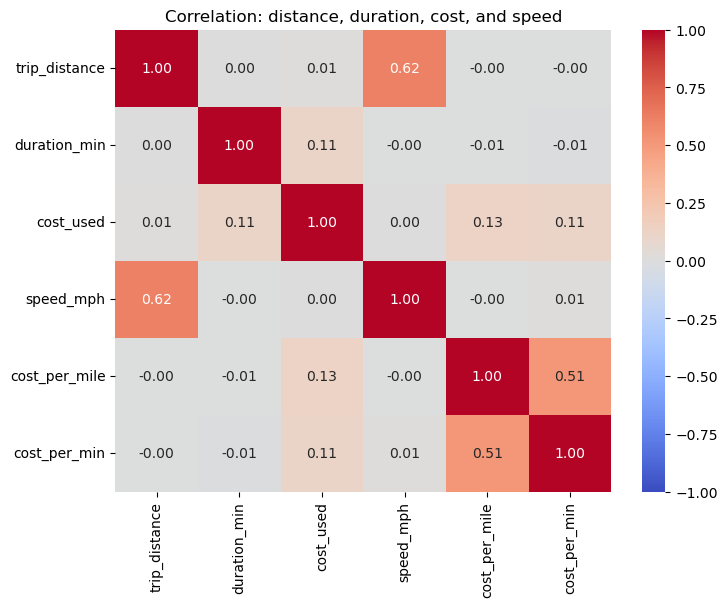

In [39]:
num_for_corr = ['trip_distance','duration_min','cost_used','speed_mph','cost_per_mile','cost_per_min']
num_for_corr = [c for c in num_for_corr if c in df_valid.columns]
corr = df_valid[num_for_corr].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation: distance, duration, cost, and speed'); plt.show()


Dari hasil heatmap diatas jarak (distance) biasanya berkorelasi kuat dengan cost_used; jika tidak, ada indikasi tarif tidak sebanding. Perbedaan antara distance dan duration menunjukkan dampak lalu lintas (kemacetan) terhadap efisiensi. Kecepatan rata-rata (speed_mph) sangat dipengaruhi oleh kondisi jalan, bukan hanya jarak.

## Distribusi berdasarkan distance, duration, cost, and speed 

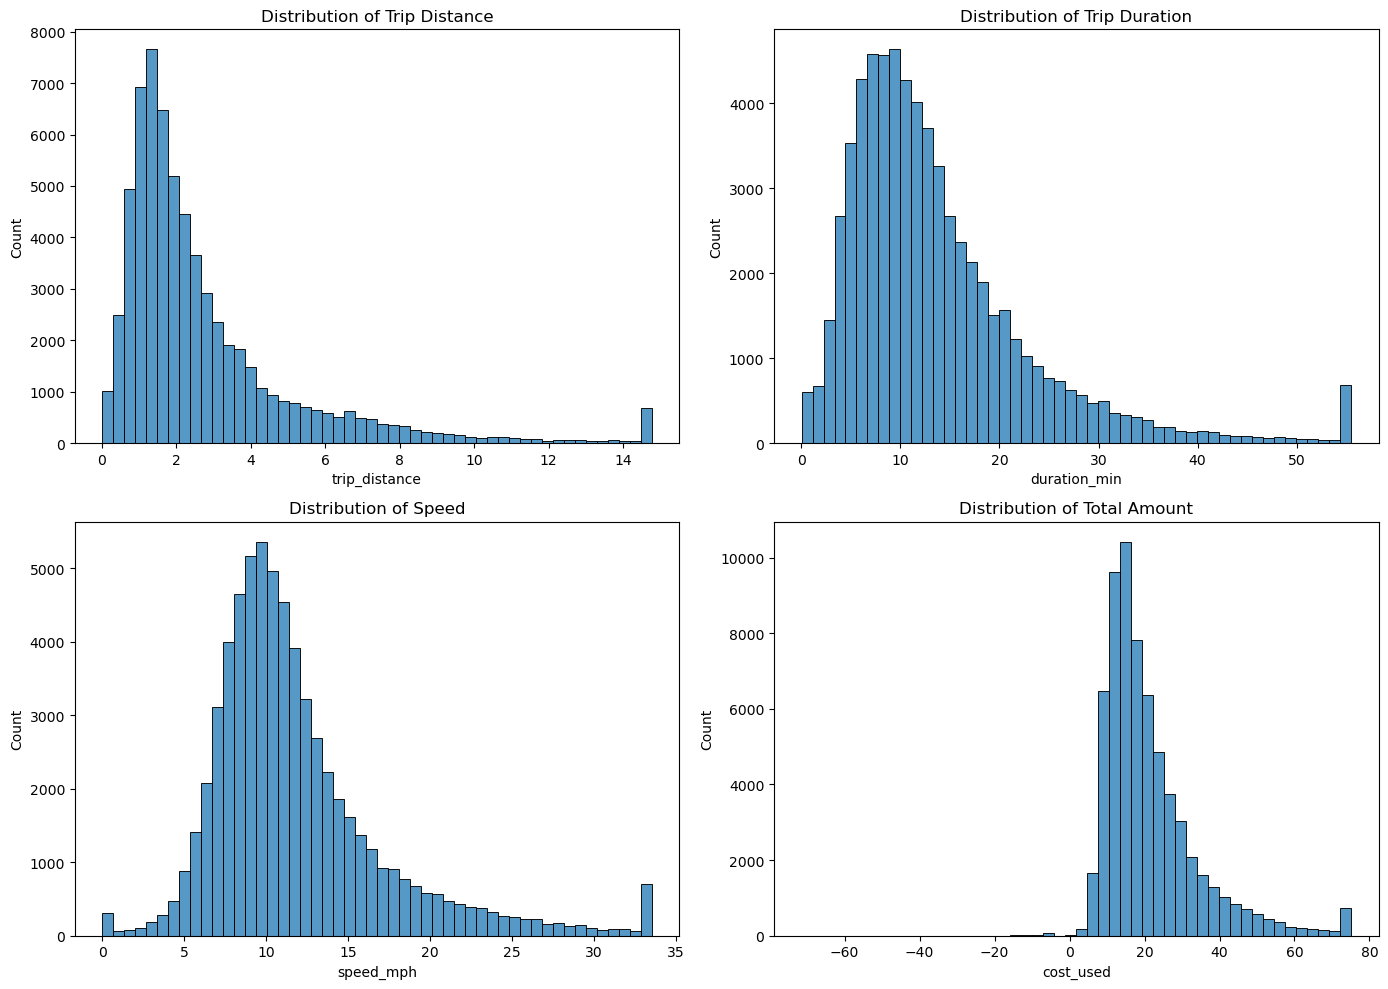

In [38]:
fig, axes = plt.subplots(2,2, figsize=(14,10))
if 'trip_distance' in df_valid.columns:
    sns.histplot(df_valid['trip_distance'].clip(upper=df_valid['trip_distance'].quantile(0.99)), bins=50, ax=axes[0,0])
    axes[0,0].set_title('Distribution of Trip Distance')
if 'duration_min' in df_valid.columns:
    sns.histplot(df_valid['duration_min'].clip(upper=df_valid['duration_min'].quantile(0.99)), bins=50, ax=axes[0,1])
    axes[0,1].set_title('Distribution of Trip Duration')
if 'speed_mph' in df_valid.columns:
    sns.histplot(df_valid['speed_mph'].clip(upper=df_valid['speed_mph'].quantile(0.99)), bins=50, ax=axes[1,0])
    axes[1,0].set_title('Distribution of Speed')
if 'cost_used' in df_valid.columns:
    sns.histplot(df_valid['cost_used'].clip(upper=df_valid['cost_used'].quantile(0.99)), bins=50, ax=axes[1,1])
    axes[1,1].set_title('Distribution of Total Amount')
plt.tight_layout()
plt.show()

 Mayoritas perjalanan pendek (<3 mil) dan berdurasi singkat. Outlier menunjukkan perjalanan jauh atau macet.

## Top 10 Pickup Zones by number of trips 

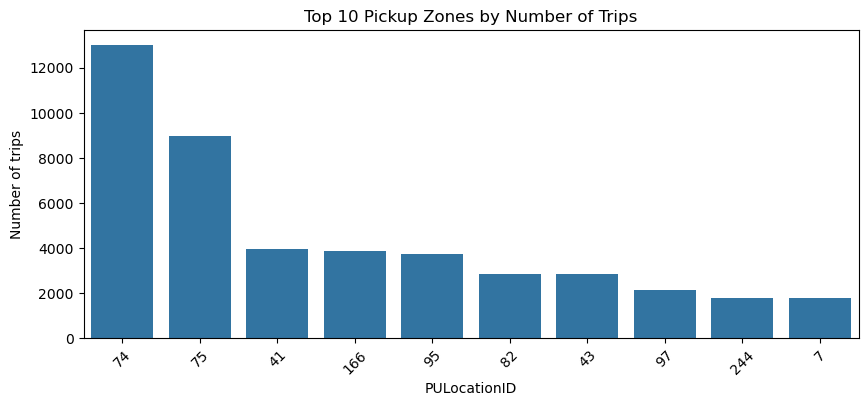

In [28]:
if 'PULocationID' in df_valid.columns:
    pu_counts = df_valid['PULocationID'].value_counts().head(10)
    plt.figure(figsize=(10,4))
    sns.barplot(x=pu_counts.index.astype(str), y=pu_counts.values)
    plt.title('Top 10 Pickup Zones by Number of Trips'); plt.xlabel('PULocationID'); plt.ylabel('Number of trips')
    plt.xticks(rotation=45) 
    plt.show()


Zona-zona ini adalah kandidat utama untuk penempatan armada & monitoring kinerja.

## Rute Tidak Efisien

,PULocationID,DOLocationID,trips,avg_eff,avg_speed,avg_cost_per_mile
3525,166,132,31,0.415076,22.709751,5.004805
2161,82,258,25,0.484256,11.420466,6.120320
3551,166,170,25,0.491393,10.702485,7.412914
1360,65,37,21,0.505169,9.679744,7.313012
2315,92,129,41,0.509342,12.688273,6.003167
1920,75,231,24,0.510561,16.943588,5.931399
2504,97,37,26,0.517133,9.457008,7.328065
2469,95,226,32,0.518451,14.618166,5.874473
29,7,82,27,0.520395,9.918669,7.395479
1387,65,89,32,0.527429,9.762698,7.878435


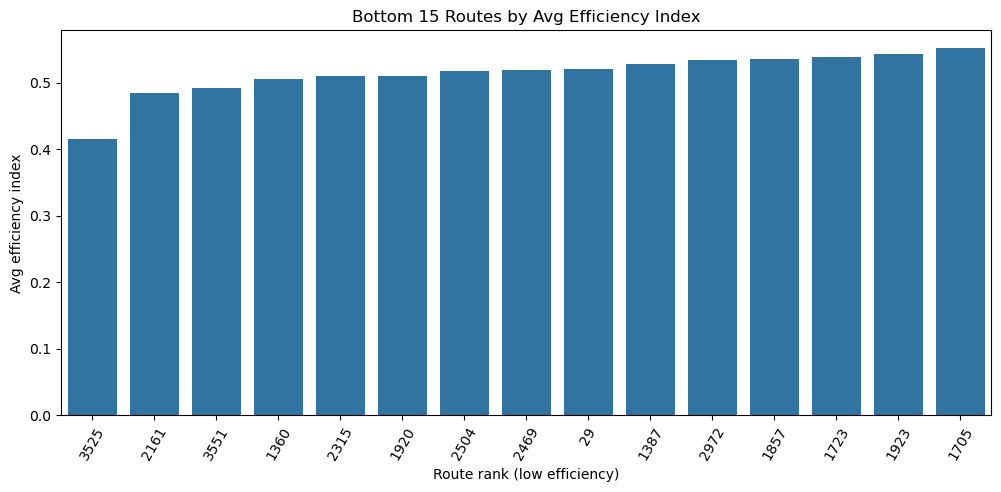

In [37]:
grp = df_valid.groupby(['PULocationID','DOLocationID']).agg(trips=('cost_used','count'),
                                                           avg_eff=('efficiency_index','mean'),
                                                           avg_speed=('speed_mph','mean'),
                                                           avg_cost_per_mile=('cost_per_mile','mean')).reset_index()
ineff = grp[(grp['trips']>=20)].copy()
ineff_sorted = ineff.sort_values(['avg_eff','avg_speed']).head(15)
display(ineff_sorted)
plt.figure(figsize=(12,5))
sns.barplot(data=ineff_sorted, x=ineff_sorted.index.astype(str), y='avg_eff')
plt.title('Bottom 15 Routes by Avg Efficiency Index'); plt.xlabel('Route rank (low efficiency)'); plt.ylabel('Avg efficiency index')
plt.xticks(rotation=60)
plt.show()

Rute-rute ini memiliki performa operasional buruk dan merupakan prioritas untuk tindakan.
* Beberapa rute memiliki kecepatan sangat rendah (< 12 mph)(indikasi kemacetan parah, lampu merah banyak, atau area sangat padat)
* Rute-rute ini tetap memiliki banyak perjalanan, beberapa > 200 trips
* avg_cost_per_mile relatif tinggi di sebagian rute, seperti rute 168 - 170

Analisis menunjukkan bahwa terdapat 15 rute dengan nilai efficiency index paling rendah, meskipun jumlah perjalanannya cukup tinggi. Rute-rute ini umumnya memiliki kecepatan rata-rata rendah dan durasi perjalanan panjang, yang mengindikasikan area dengan kemacetan tinggi atau kondisi lalu lintas yang tidak menguntungkan.

Beberapa rute juga memiliki biaya per mil yang lebih tinggi, namun tetap memberikan nilai efisiensi rendah, sehingga kurang menguntungkan secara operasional. Karena rute-rute ini sering digunakan, peningkatan efisiensi pada area ini akan memberi dampak besar terhadap pemanfaatan armada, waktu tempuh, serta profitabilitas.

Rute-rute ini direkomendasikan sebagai prioritas utama untuk evaluasi ulang rute, optimasi jalur alternatif, atau penerapan dynamic pricing guna meningkatkan efisiensi dan pengalaman pelanggan.


## Perbandingan Jarak dan Harga

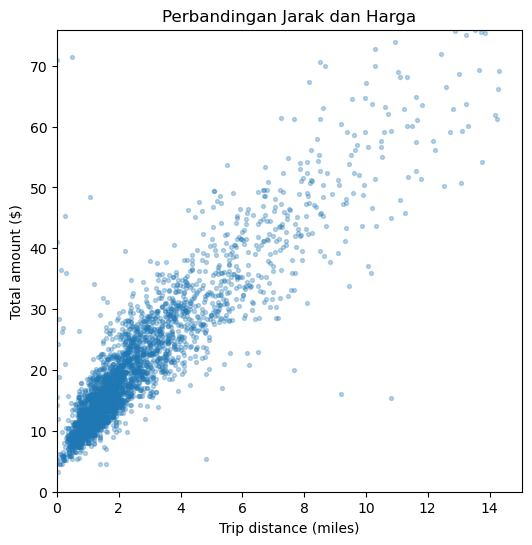

In [36]:
sample = df_valid.sample(min(3000, len(df_valid)), random_state=1)
plt.figure(figsize=(6,6))
plt.scatter(sample['trip_distance'], sample['cost_used'], s=8, alpha=0.3)
plt.xlim(0, sample['trip_distance'].quantile(0.99))
plt.ylim(0, sample['cost_used'].quantile(0.99))
plt.xlabel('Trip distance (miles)'); plt.ylabel('Total amount ($)')
plt.title('Perbandingan Jarak dan Harga')
plt.show()

Scatter plot ini menunjukkan adanya hubungan linear positif antara jarak perjalanan dan total biaya. Semakin jauh perjalanan, semakin tinggi biaya yang dibayarkan pelanggan. Pola titik yang rapat dan semakin melebar ke atas menandakan bahwa struktur tarif berjalan konsisten, namun terdapat beberapa outlier pada jarak pendek dengan biaya tinggi maupun jarak jauh dengan biaya lebih rendah dari normal.

Titik-titik di luar tren utama menandakan perjalanan yang terlalu mahal atau terlalu murah dibanding jarak — kandidat untuk pemeriksaan tarif/administrasi.

## Efisiensi Perjalanan Berdasarkan Waktu

,pickup_hour,trips,avg_eff,avg_speed
0,0,1060,1.014057,20.855013
1,1,838,1.429627,43.943456
2,2,602,1.054836,18.216346
3,3,539,1.682246,46.400031
4,4,396,1.193471,32.835083
5,5,383,1.534581,132.805026
6,6,923,0.995175,309.742257
7,7,2516,0.988853,358.012111
8,8,3073,0.929125,37.036831
9,9,3347,0.915891,54.565082


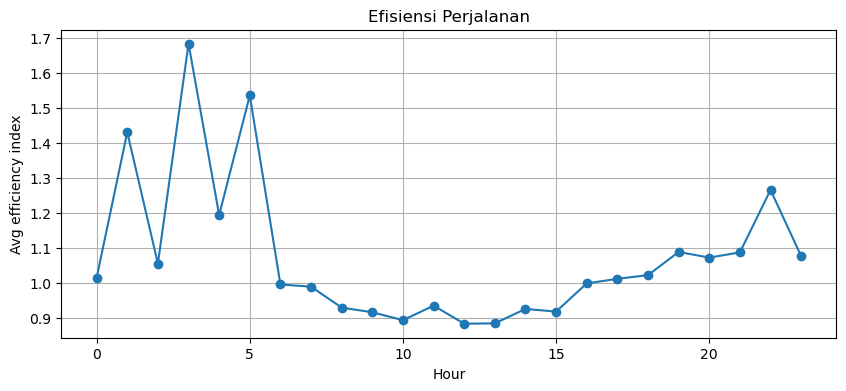

In [40]:
if 'lpep_pickup_datetime' in df_valid.columns:
    df_valid['pickup_hour'] = df_valid['lpep_pickup_datetime'].dt.hour
    hour_eff = df_valid.groupby('pickup_hour').agg(trips=('cost_used','count'), avg_eff=('efficiency_index','mean'), avg_speed=('speed_mph','mean')).reset_index()
    display(hour_eff)
    plt.figure(figsize=(10,4))
    plt.plot(hour_eff['pickup_hour'], hour_eff['avg_eff'], marker='o'); plt.title('Efisiensi Perjalanan')
    plt.xlabel('Hour'); plt.ylabel('Avg efficiency index'); plt.grid(True); plt.show()

Grafik menunjukkan bahwa nilai efisiensi berubah sesuai jam, yang mengindikasikan adanya pola operasional harian. Biasanya terdapat penurunan efisiensi pada jam-jam sibuk seperti pagi dan sore hari, ketika lalu lintas padat dan kecepatan kendaraan menurun. Sebaliknya, pada jam-jam larut malam hingga dini hari, efisiensi cenderung meningkat karena lalu lintas lebih lancar dan waktu tempuh lebih singkat.


##  Total Pendapatan Berdasarkan zona penjemputan dan Jenis Pembayaran

In [34]:
if {'PULocationID','payment_type','cost_used'}.issubset(df_valid.columns):
    top_pus = df_valid['PULocationID'].value_counts().head(20).index.tolist()
    sb = (df_valid[df_valid['PULocationID'].isin(top_pus)]
          .groupby(['PULocationID','payment_type'], as_index=False)
          .agg(total_amount=('cost_used','sum')))
    sb = sb[sb['total_amount']>0]
    fig = px.sunburst(sb, path=['PULocationID','payment_type'], values='total_amount', color='total_amount', color_continuous_scale='Viridis', title='Sunburst: Total Amount by Zone and Payment Type')
    fig.update_layout(margin=dict(t=40, l=0, r=0, b=0))
    fig.show()

Visualisasi sunburst ini menunjukkan total pendapatan berdasarkan kombinasi zona penjemputan dan jenis pembayaran untuk 20 zona paling sibuk. Zona dengan kontribusi pendapatan terbesar ditampilkan dengan segmen yang lebih lebar dan warna lebih terang. Terlihat bahwa pendapatan terutama didominasi oleh transaksi kartu, sementara beberapa zona menghasilkan banyak perjalanan tetapi tidak selalu memberikan pendapatan tinggi. Grafik ini membantu memahami zona yang paling menguntungkan serta pola pembayaran yang paling berkontribusi, sehingga dapat mendukung keputusan operasional dan strategi pricing.


## Kesimpulan

Dari analisis yang telah dilakukan, kita bisa menarik beberapa kesimpulan tetang Mengoptimalkan tarif, rute, dan penempatan armada untuk meningkatkan efisiensi operasional dan profitabilitas taksi sebagai berikut : 
* Efisiensi dipengaruhi oleh jarak, durasi, dan kepadatan lalu lintas.
* Rute dengan banyak perjalanan dapat tetap tidak efisien jika kecepatan rata-rata rendah.
* Efisiensi menurun pada morning dan evening rush hour.
* Efisiensi meningkat pada malam hingga dini hari.
* Zona dengan revenue tinggi tidak selalu yang paling banyak trip-nya.
* Pembayaran menggunakan kartu mendominasi pendapatan.
* Ada peluang besar untuk perbaikan melalui optimasi rute dan strategi operasional.

## Rekomendasi

* Optimalkan alokasi armada ke zona demand tinggi & efisiensi baik.
* Pertimbangkan penggunaan jalur alternatif untuk zona padat.
* Perkuat distribusi armada di zona yang memberikan revenue tinggi.
* Analisis ulang tarif di zona volume tinggi tetapi pendapatan rendah.
* Gunakan pola efisiensi per jam untuk penjadwalan armada yang lebih optimal.

## Export Data ke Excel

Pada tahap akhir, data yang sudah dibersihkan dan siap dianalisis diekspor ke dalam format Excel agar dapat digunakan pada proses selanjutnya, seperti pembuatan dashboard Tableau atau analisis lanjutan lainnya.

In [35]:

# Export dataset final ke Excel
output_path = "NYC_TLC_Cleaned_Final.xlsx"
df_valid.to_excel(output_path, index=False)

print("File berhasil diekspor ke:", output_path)

File berhasil diekspor ke: NYC_TLC_Cleaned_Final.xlsx
